# Business Understanding

Relevant Medical Features:
- Body Mass Index (BMI): Higher BMI is a known risk factor for Type 2 diabetes.
- Blood Pressure (BP): Hypertension is a common comorbidity in diabetic patients and can exacerbate complications.
- Lipid Profile (Cholesterol, Triglycerides): Dyslipidemia is prevalent in people with diabetes and increases the risk of cardiovascular disease.
- Age and Gender: Age is a risk factor for Type 2 diabetes, and men may have slightly higher rates of diabetes.

Treatment Regimens
- Medications: Includes insulin, oral hypoglycemic agents (metformin, sulfonylureas, etc.), and newer classes like GLP-1 receptor agonists.
- Lifestyle Changes: Diet, exercise, and weight loss are essential for managing Type 2 diabetes.
- Monitoring: Regular monitoring of blood glucose levels, especially in insulin-dependent diabetics, is critical for management.

Lifestyle Factors
- Diet: Carbohydrate intake is closely linked to blood glucose levels.
- Physical Activity: Regular exercise increases insulin sensitivity and helps manage glucose levels.
- Smoking and Alcohol: Both are risk factors for diabetes complications, particularly cardiovascular diseases.

# Data Understanding

In [4]:
%pip install pandas
%pip install scipy
%pip install numpy
%pip install matplotlib
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [86]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn import datasets,  linear_model, preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

## Describing Data

In [61]:
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True, scaled=True)

In [62]:
# Create a dummy variable for Sex when the data is not scaled.

# X = pd.get_dummies(X, columns=['sex'], prefix='sex', dtype='float', drop_first=True)
# X['sex'] = X['sex'].replace({1:'male', 2:'female'}).astype('category')


In [64]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [83]:
X.describe().round(3)

,age,bmi,bp,total serum cholesterol,low density lipoproteins,high density lipoproteins,total cholesterol,serum triglycerides level,blood sugar level
count,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000
mean,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000
std,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048
min,-0.107,-0.090,-0.112,-0.127,-0.116,-0.102,-0.076,-0.126,-0.138
25%,-0.037,-0.034,-0.037,-0.034,-0.030,-0.035,-0.039,-0.033,-0.033
50%,0.005,-0.007,-0.006,-0.004,-0.004,-0.007,-0.003,-0.002,-0.001
75%,0.038,0.031,0.036,0.028,0.030,0.029,0.034,0.032,0.028
max,0.111,0.171,0.132,0.154,0.199,0.181,0.185,0.134,0.136


In [80]:
# Checking for any null/na records
X.notna().mean() * 100

age                          100.0
sex                          100.0
bmi                          100.0
bp                           100.0
total serum cholesterol      100.0
low density lipoproteins     100.0
high density lipoproteins    100.0
total cholesterol            100.0
serum triglycerides level    100.0
blood sugar level            100.0
dtype: float64

In [81]:
# the progression of diabetes response variable
y.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

## Exploring Data

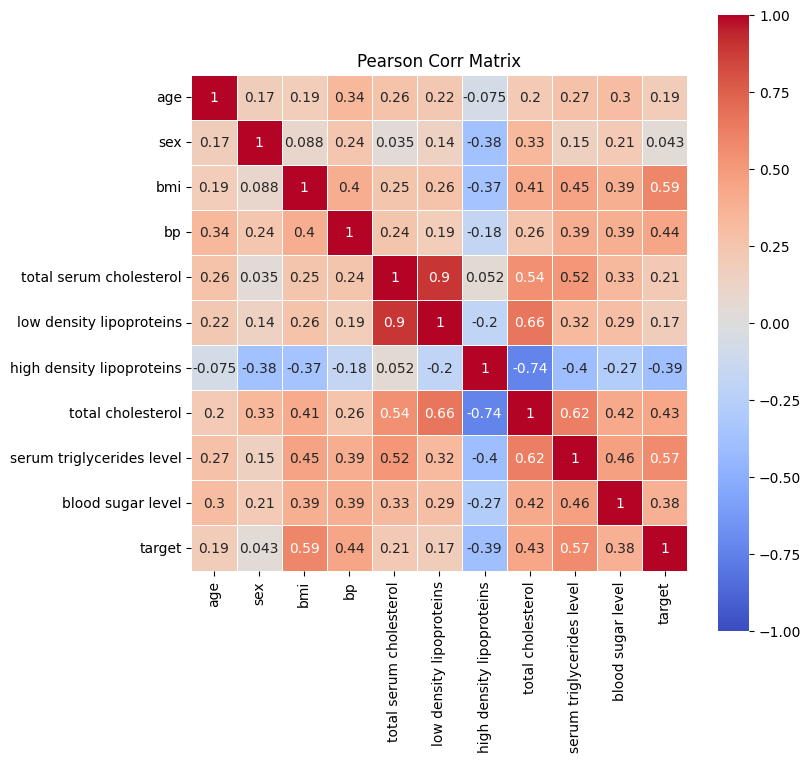

In [96]:
correlation_matrix = X.join(y).corr()

plt.figure(figsize=(8,8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    center=0, 
    vmin=-1, 
    vmax=1, 
    square=True, 
    linewidths=0.5,
    )
plt.title("Pearson Corr Matrix")
plt.show()

- >0.80 corr: 
    - total serum cholesterol and low density lipoproteins
- >0.60 to 0.80 corr:
    - total cholesterol and low density lipoproteins
    - total cholesterol and high density lipoporteins (neg)
    - serum triglycerides level and total cholesterol
- >0.40 to 0.60:
    - bp and bmi
    - total cholesterol and total serum cholesterol
    - serum triglycerides level and bmi
    - serum triglcyerides level and total serum cholesterol
    - serum triglycerides level and high density lipoprotiens (neg)
    - blood sugar level and total cholesterol
    - blood sugar level and serum triglycerides level
    - target and bmi
    - target and bp
    - target and total cholesterol
    - target and serum triglycerides level

In [97]:
pd.plotting.scatter_matrix(X.join(y), alpha=0.2)

# Data Preparation

In [69]:
df = pd.merge(X, y, left_index=True, right_index=True)

df = df.rename(columns={
    's1':'total serum cholesterol',
    's2':'low density lipoproteins',
    's3':'high density lipoproteins',
    's4':'total cholesterol',
    's5':'serum triglycerides level',
    's6':'blood sugar level'
})

df

,age,sex,bmi,bp,total serum cholesterol,low density lipoproteins,high density lipoproteins,total cholesterol,serum triglycerides level,blood sugar level,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [71]:
X = X.rename(columns={
    's1':'total serum cholesterol',
    's2':'low density lipoproteins',
    's3':'high density lipoproteins',
    's4':'total cholesterol',
    's5':'serum triglycerides level',
    's6':'blood sugar level'
})


## Selecting Data

## Cleaning Data

## Formatting Data

# Modeling

## Building the Models

In [72]:
reg = linear_model.LinearRegression(fit_intercept=True)


In [73]:
reg.fit(X, y)


LinearRegression()

In [74]:
coef = pd.DataFrame(data=reg.coef_.reshape(1,-1), columns=reg.feature_names_in_)
print(coef.T.rename(columns={0:'coef'}))
print(f'Intercept: {reg.intercept_}')

                                 coef
age                        -10.009866
sex                       -239.815644
bmi                        519.845920
bp                         324.384646
total serum cholesterol   -792.175639
low density lipoproteins   476.739021
high density lipoproteins  101.043268
total cholesterol          177.063238
serum triglycerides level  751.273700
blood sugar level           67.626692
Intercept: 152.13348416289597


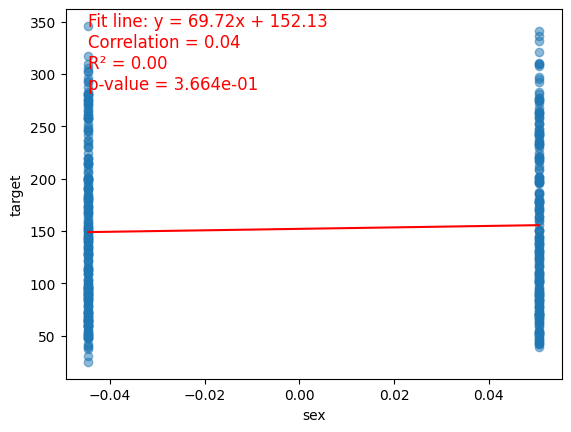

In [75]:
x_axis_dim = df[df.columns[1]]
y_axis_dim = df['target']

# Create the scatter plot
plt.scatter(x_axis_dim, y_axis_dim, alpha=0.5)

# Perform linear regression using scipy
slope, intercept, r_value, p_value, std_err = stats.linregress(x_axis_dim, y_axis_dim)

# Add the fit line to the scatter plot
plt.plot(x_axis_dim, slope * x_axis_dim + intercept, color='red')

# Add labels
plt.xlabel(x_axis_dim.name)
plt.ylabel(y_axis_dim.name)

# Create the equation string
equation_text = f'Fit line: y = {slope:.2f}x + {intercept:.2f}'
r_text = f'Correlation = {r_value:.2f}'
r2_text = f'R² = {r_value**2:.2f}'
pvalue_text = f'p-value = {p_value:.3e}'

# Set initial position for text
x_position = x_axis_dim.min()
y_position = y_axis_dim.max()

# Add the equation, R², and p-value to the plot as text, with different y positions
plt.text(x_position, y_position, equation_text, color='red', fontsize=12)
plt.text(x_position, y_position - 20, r_text, color='red', fontsize=12)
plt.text(x_position, y_position - 40, r2_text, color='red', fontsize=12)
plt.text(x_position, y_position - 60, pvalue_text, color='red', fontsize=12)

# Show plot
plt.show()


## Assessing the Models

# Evaluation

## Evaluating the Results

## Review Process

## Determining the Next Steps

# Deployment

## Producing a Final Report